In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from helpers import *
from preprocessing import *

In [36]:
dataset = load_csv_data("./dataset")
with open("./dataset/x_test.csv") as file:
    HEADER = file.readline().strip().split(",")[1:]

In [ ]:
raw_and_calculated_features = ["GENHLTH","PHYSHLTH","MENTHLTH","POORHLTH","HLTHPLN1","PERSDOC2","MEDCOST","CHECKUP1","BPHIGH4","BPMEDS","BLOODCHO","CHOLCHK","TOLDHI2","CVDSTRK3","ASTHMA3","ASTHNOW","CHCSCNCR","CHCOCNCR","CHCCOPD1","HAVARTH3","ADDEPEV2","CHCKIDNY","DIABETE3","DIABAGE2","SEX","MARITAL",
                               "VETERAN3","EMPLOY1","CHILDREN","INCOME2","QLACTLM2","USEEQUIP","BLIND","DECIDE","DIFFWALK","DIFFDRES","DIFFALON","SMOKE100","SMOKDAY2","STOPSMK2","LASTSMK2","USENOW3","ALCDAY5","AVEDRNK2","DRNK3GE5","MAXDRNKS","FRUITJU1","FRUIT1","FVBEANS","FVGREEN","FVORANG","VEGETAB1",
                               "EXERANY2","EXEROFT1","EXERHMM1","EXEROFT2","EXERHMM2","STRENGTH","LMTJOIN3","ARTHDIS2","ARTHSOCL","JOINPAIN","SEATBELT","FLUSHOT6","PNEUVAC3","HIVTST6","PDIABTST","PREDIAB1","INSULIN","BLDSUGAR","FEETCHK2","DOCTDIAB","CHKHEMO3","FEETCHK","EYEEXAM","DIABEYE","DIABEDU","CAREGIV1",
                               "CRGVREL1","CRGVLNG1","CRGVHRS1","CRGVPRB1","VIDFCLT2","VIREDIF3","VIPRFVS2","VINOCRE2","VIEYEXM2","VIINSUR2","VICTRCT4","VIGLUMA2","VIMACDG2","CIMEMLOS","CDHOUSE","CDASSIST","CDHELP","CDSOCIAL","CDDISCUS","WTCHSALT","DRADVISE","ASTHMAGE","ASATTACK","ASERVIST","ASDRVIST",
                               "ASRCHKUP","ASACTLIM","ASYMPTOM","ASNOSLEP","ASTHMED3","ASINHALR","HAREHAB1","STREHAB1","CVDASPRN","ASPUNSAF","RLIVPAIN","RDUCHART","RDUCSTRK","ARTTODAY","ARTHWGT","ARTHEXER","ARTHEDU","SCNTMNY1","SCNTMEL1","SCNTWRK1","SCNTLWK1","EMTSUPRT","LSATISFY","MISTMNT",
                               "ADANXEV","_RFHLTH","_HCVU651","_RFHYPE5","_CHOLCHK","_RFCHOL","_LTASTH1","_CASTHM1","_ASTHMS1","_DRDXAR1","_PRACE1","_MRACE1","_HISPANC","_RACE","_RACEG21","_RACEGR3","_RACE_G1","_AGEG5YR","_AGE65YR","_AGE80","_AGE_G","HTIN4","HTM4","WTKG3","_BMI5","_BMI5CAT","_RFBMI5",
                               "_EDUCAG","_INCOMG","_SMOKER3","_RFSMOK3","DRNKANY5","DROCDY3_","_RFBING5","_DRNKWEK","_RFDRHV5","FTJUDA1_","FRUTDA1_","BEANDAY_","GRENDAY_","ORNGDAY_","VEGEDA1_","_FRUTSUM","_VEGESUM","_FRTLT1","_VEGLT1","_FRT16","_VEG23","_FRUITEX","_VEGETEX","_TOTINDA","METVL11_","METVL21_",
                               "MAXVO2_","FC60_","ACTIN11_","ACTIN21_","PADUR1_","PADUR2_","PAFREQ1_","PAFREQ2_","_MINAC11","_MINAC21","STRFREQ_","PAMISS1_","PAMIN11_","PAMIN21_","PA1MIN_","PAVIG11_","PAVIG21_","PA1VIGM_","_PACAT1","_PAINDX1","_PA150R2","_PA300R2","_PA30021","_PASTRNG","_PAREC1","_PASTAE1",
                               "_LMTACT1","_LMTWRK1","_LMTSCL1","_RFSEAT2","_RFSEAT3","_FLSHOT6","_PNEUMO2","_AIDTST3"]

binary_list = ["HLTHPLN1","MEDCOST","BPMEDS","BLOODCHO","TOLDHI2","CVDSTRK3","ASTHMA3","ASTHNOW","CHCSCNCR","CHCOCNCR","CHCCOPD1","HAVARTH3","ADDEPEV2","CHCKIDNY","SEX","VETERAN3","QLACTLM2","USEEQUIP","BLIND","DECIDE","DIFFWALK","DIFFDRES","DIFFALON","SMOKE100","STOPSMK2","EXERANY2",
               "LMTJOIN3","ARTHDIS2","FLUSHOT6","PNEUVAC3","HIVTST6","PDIABTST","INSULIN","EYEEXAM","DIABEYE","DIABEDU","CAREGIV1","VIINSUR2","VIGLUMA2","VIMACDG2","CIMEMLOS","CDDISCUS","WTCHSALT","DRADVISE","ASATTACK","HAREHAB1","STREHAB1","CVDASPRN","RLIVPAIN","RDUCHART","RDUCSTRK",
               "ARTHWGT","ARTHEXER","ARTHEDU","MISTMNT","ADANXEV","_RFHLTH","_HCVU651","_RFHYPE5","_RFCHOL","_LTASTH1","_CASTHM1","_RACEG21","_AGE65YR","_RFBMI5","_RFSMOK3","_RFBING5","_RFDRHV5","_FRTLT1","_VEGLT1","_FRUITEX","_VEGETEX","_TOTINDA","PAMISS1_","_PAINDX1","_PASTRNG","_PASTAE1","_RFSEAT2",
               "_RFSEAT3","_FLSHOT6","_PNEUMO2","_AIDTST3","_DRDXAR1","_HISPANC","DRNKANY5","_FRTRESP","_VEGRESP","_FRT16","_VEG23"]
categorical_label_list = ["GENHLTH","PERSDOC2","CHECKUP1","BPHIGH4","CHOLCHK","EMPLOY1","INCOME2","SMOKDAY2","LASTSMK2","USENOW3","ARTHSOCL","SEATBELT","CRGVREL1","CRGVLNG1","CRGVHRS1","CRGVPRB1","VIDFCLT2","VIREDIF3","VIPRFVS2","VINOCRE2","VIEYEXM2","VICTRCT4","CDHOUSE","CDASSIST","CDHELP","CDSOCIAL",
                          "ASYMPTOM","ASNOSLEP","ASTHMED3","ASINHALR","ASPUNSAF","ARTTODAY","SCNTMNY1","SCNTMEL1","EMTSUPRT","LSATISFY","_CHOLCHK","_ASTHMS1","_PRACE1","_MRACE1","_RACE","_RACEGR3","_RACE_G1","_AGEG5YR","_AGE80","_SMOKER3","_PAREC1","_LMTACT1","_LMTWRK1","_LMTSCL1",
                          "_AGE_G","_BMI5CAT","_CHLDCNT","_EDUCAG","_INCOMG","ACTIN11_","ACTIN21_","_PACAT1","_PA150R2","_PA300R2","_PA30021"]
num_list = ["PHYSHLTH","MENTHLTH","POORHLTH","DIABAGE2","CHILDREN","ALCDAY5","AVEDRNK2","DRNK3GE5","MAXDRNKS","FRUITJU1","FRUIT1","FVBEANS","FVGREEN","FVORANG","VEGETAB1","EXEROFT1","EXERHMM1","EXEROFT2","EXERHMM2","STRENGTH","JOINPAIN","BLDSUGAR","FEETCHK2","DOCTDIAB","CHKHEMO3","FEETCHK",
            "ASTHMAGE","ASERVIST","ASDRVIST","ASRCHKUP","ASACTLIM","SCNTWRK1","SCNTLWK1","HTIN4","HTM4","WTKG3","_BMI5","DROCDY3_","_DRNKWEK","FTJUDA1_","FRUTDA1_","BEANDAY_","GRENDAY_","ORNGDAY_","VEGEDA1_","_MISFRTN","_MISVEGN","_FRUTSUM","_VEGESUM","METVL11_","METVL21_","MAXVO2_","FC60_","PADUR1_",
            "PADUR2_","PAFREQ1_","PAFREQ2_","_MINAC11","_MINAC21","STRFREQ_","PAMIN11_","PAMIN21_","PA1MIN_","PAVIG11_","PAVIG21_","PA1VIGM_"]

# features which will be given value NaN
# for instance, in list null_i_j, i and j will become NaN
null_7_9 = ["GENHLTH","HLTHPLN1","PERSDOC2","MEDCOST","CHECKUP1","BPHIGH4","BPMEDS","BLOODCHO","CHOLCHK","TOLDHI2","CVDSTRK3","ASTHMA3","ASTHNOW","CHCSCNCR","CHCOCNCR","CHCCOPD1","HAVARTH3","ADDEPEV2","CHCKIDNY","VETERAN3","EMPLOY1","QLACTLM2","USEEQUIP","BLIND","DECIDE","DIFFWALK","DIFFDRES",
            "DIFFALON","SMOKE100","SMOKDAY2","STOPSMK2","USENOW3","EXERANY2","LMTJOIN3","ARTHDIS2","ARTHSOCL","SEATBELT","FLUSHOT6","PNEUVAC3","HIVTST6","PDIABTST","PREDIAB1","DIABETE3","EYEEXAM","DIABEYE","DIABEDU","CAREGIV1","CRGVLNG1","CRGVHRS1","VIPRFVS2","VIEYEXM2","VIINSUR2","CIMEMLOS",
            "CDHOUSE","CDASSIST","CDHELP","CDSOCIAL","CDDISCUS","WTCHSALT","DRADVISE","ASYMPTOM","ASTHMED3","ASINHALR","HAREHAB1","STREHAB1","CVDASPRN","ASPUNSAF","RLIVPAIN","RDUCHART","RDUCSTRK","ARTTODAY","ARTHWGT","ARTHEXER","ARTHEDU","SCNTMNY1","SCNTMEL1","EMTSUPRT","LSATISFY","MISTMNT",
            "ADANXEV","DRNKANY5"]
null_77_99 = ["PHYSHLTH","MENTHLTH","POORHLTH","INCOME2","LASTSMK2","AVEDRNK2","DRNK3GE5","MAXDRNKS","JOINPAIN","DOCTDIAB","CHKHEMO3","FEETCHK","CRGVREL1","CRGVPRB1","VINOCRE2","_PRACE1","_MRACE1"]
null_98_99 = ["DIABAGE2","ASTHMAGE","ASRCHKUP"]
null_98 = ["ASERVIST","ASDRVIST"]
null_99 = ["CHILDREN"]
null_777_999 = ["ALCDAY5","FRUITJU1","FRUIT1","FVBEANS","FVGREEN","FVORANG","VEGETAB1","EXEROFT1","EXERHMM1","EXEROFT2","EXERHMM2","STRENGTH","BLDSUGAR","FEETCHK2","ASACTLIM"]
null_9 = ["INSULIN","_RFHLTH","_HCVU651","_RFHYPE5","_CHOLCHK","_RFCHOL","_LTASTH1","_CASTHM1","_ASTHMS1","_HISPANC","_RACE","_RACEG21","_RACEGR3","_RFBMI5","_CHLDCNT","_EDUCAG","_INCOMG","_SMOKER3","_RFSMOK3","_RFBING5","_RFDRHV5","_FRTLT1","_VEGLT1","_TOTINDA","PAMISS1_","_PACAT1","_PAINDX1",
          "_PA150R2","_PA300R2","_PA30021","_PASTRNG","_PAREC1","_PASTAE1","_LMTACT1","_LMTWRK1","_LMTSCL1","_RFSEAT2","_RFSEAT3","_FLSHOT6","_PNEUMO2","_AIDTST3"]
null_7 = ["VIDFCLT2","VIREDIF3","VICTRCT4","VIGLUMA2","VIMACDG2","ASATTACK","ASNOSLEP"]
null_97_99 = ["SCNTWRK1","SCNTLWK1"]
null_14 = ["_AGEG5YR"]
null_3 = ["_AGE65YR"]
null_99999 = ["WTKG3"]
null_99900 = ["_DRNKWEK","MAXVO2_","FC60_","PAFREQ1_","PAFREQ2_"]
null_99000 = ["STRFREQ_"]
null_900 = ["DROCDY3_"]

# list containing all the null lists above
columns_null_list = [null_9,null_77_99,null_14,null_3,null_99999,null_99900,null_99000,null_7_9,null_900,null_98_99,null_98,null_99,null_777_999,null_7,null_97_99]
values_null_list = [[9],[77,99],[14],[3],[99999],[99900],[99000],[7,9],[900],[98,99],[98],[99],[777,999],[7],[97,99]]

# list of features whose value will be transformed to 0
zeros_88 = ["PHYSHLTH","MENTHLTH","POORHLTH","CHILDREN","DRNK3GE5","DOCTDIAB","CHKHEMO3","FEETCHK","ASERVIST","ASDRVIST","ASRCHKUP"]
zeros_8 = ["CHECKUP1","EMPLOY1","LASTSMK2","SEATBELT","EYEEXAM","CAREGIV1","VIDFCLT2","VINOCRE2","VIEYEXM2","VIINSUR2","ASYMPTOM","ASNOSLEP","ASTHMED3","ASINHALR","SCNTMNY1","SCNTMEL1"]
zeros_888 = ["ALCDAY5","STRENGTH","BLDSUGAR","FEETCHK2","ASACTLIM"]
zeros_555 = ["FRUITJU1","FRUIT1","FVBEANS","FVGREEN","FVORANG","VEGETAB1","FEETCHK2"]
zeros_98 = ["CHKHEMO3","SCNTWRK1","SCNTLWK1"]
zeros_97 = ["ASTHMAGE"]

columns_zeros_list = [zeros_88, zeros_8, zeros_888, zeros_555, zeros_98, zeros_97]
values_zeros_list = [88, 8, 888, 555, 98, 97]

In [ ]:
x_train, x_test, y_train, _, _ = dataset
x_train_selected = select_features(x_train, raw_and_calculated_features, HEADER)

# pre-processing
preprocess_null_dataset(x_train_selected, values_null_list, columns_null_list, raw_and_calculated_features)
process_diab(x_train_selected,"DIABETE3",raw_and_calculated_features)
process_diab(x_train_selected,"PREDIAB1",raw_and_calculated_features)
process_rehab(x_train_selected,"HAREHAB1",raw_and_calculated_features)
process_rehab(x_train_selected,"STREHAB1",raw_and_calculated_features)

In [123]:
total_posi = (y_train == 1).sum()
total_nega = (y_train == -1).sum()
total_cases = y_train.shape[0]
print(f"There are {100*total_posi/total_cases}% of positive cases out of the {total_cases} total cases")

There are 8.830207079403294% of positive cases out of the 328135 total cases


In [ ]:
# drop features which have more than 25% of NaNs

features_to_drop = []
for feature_idx, feature in enumerate(raw_and_calculated_features):
    x_feature = x_train_selected[:,feature_idx]
    blank_values = np.isnan(x_train_selected[:,feature_idx]).sum()
    total_values = len(x_feature)
    if 100*blank_values/total_values >= 25:
        features_to_drop.append(feature)
        print(f"| There are {blank_values} NaNs for feature {feature} which is {100*blank_values/total_values}% of the total values |")

| There are 163417 NaNs for feature POORHLTH which is 49.80175842260046% of the total values |
| There are 196550 NaNs for feature BPMEDS which is 59.89912688375212% of the total values |
| There are 285503 NaNs for feature ASTHNOW which is 87.00778642936596% of the total values |
| There are 288693 NaNs for feature DIABAGE2 which is 87.97994727779725% of the total values |
| There are 100938 NaNs for feature EMPLOY1 which is 30.76111966111509% of the total values |
| There are 191623 NaNs for feature SMOKDAY2 which is 58.397610739482225% of the total values |
| There are 282666 NaNs for feature STOPSMK2 which is 86.14320325475795% of the total values |
| There are 237993 NaNs for feature LASTSMK2 which is 72.52898959269812% of the total values |
| There are 173523 NaNs for feature AVEDRNK2 which is 52.88158837064013% of the total values |
| There are 173414 NaNs for feature DRNK3GE5 which is 52.84837033538025% of the total values |
| There are 176367 NaNs for feature MAXDRNKS which is

In [ ]:
# total number of features before NaN filtering

len(raw_and_calculated_features)

214

In [ ]:
# number of dropped features

len(features_to_drop)

97

In [ ]:
# add mode and mean to categorical and numerical respectively

parse_idx = [raw_and_calculated_features.index(feature) for feature in features_to_drop]
x_train_selected[:,parse_idx] = np.nan_to_num(x_train_selected[:,parse_idx], 0)
filling_nan_num(x_train_selected, num_list, raw_and_calculated_features)
filling_nan_cat(x_train_selected, binary_list + categorical_label_list, raw_and_calculated_features)

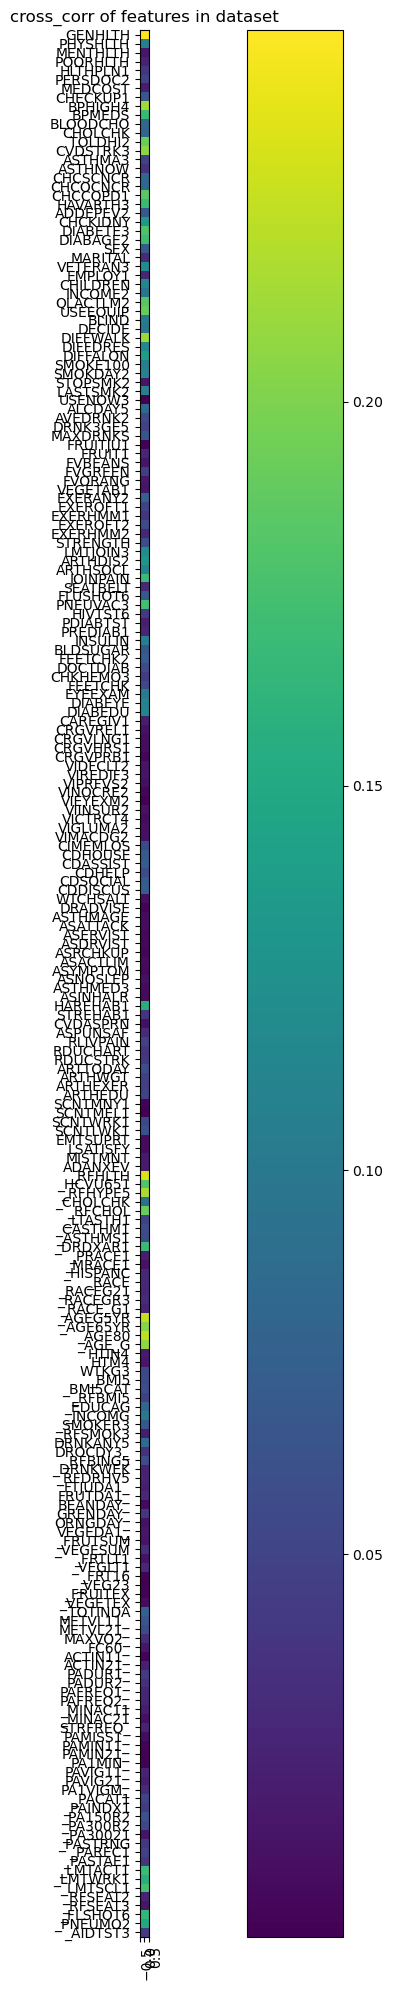

In [ ]:
cross_corr = np.abs(np.corrcoef(np.concatenate((y_train[:,np.newaxis],x_train_selected),axis=1), rowvar = False))[0,1:]

fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(cross_corr[:,np.newaxis])

ax.set_yticks(np.arange(len(raw_and_calculated_features)), labels=raw_and_calculated_features)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
        rotation_mode="anchor")
fig.colorbar(im)

ax.set_title("cross_corr of features in dataset")
fig.tight_layout()
plt.show()

In [ ]:
# store features with correlation > 10%

correlated_features = [raw_and_calculated_features[i] for i in range(cross_corr.shape[0]) if cross_corr[i] >= 0.1]

In [130]:
correlated_features

['GENHLTH',
 'PHYSHLTH',
 'BPHIGH4',
 'BPMEDS',
 'TOLDHI2',
 'CVDSTRK3',
 'CHCCOPD1',
 'HAVARTH3',
 'CHCKIDNY',
 'DIABETE3',
 'DIABAGE2',
 'VETERAN3',
 'CHILDREN',
 'QLACTLM2',
 'USEEQUIP',
 'BLIND',
 'DIFFWALK',
 'DIFFDRES',
 'DIFFALON',
 'SMOKE100',
 'SMOKDAY2',
 'LASTSMK2',
 'LMTJOIN3',
 'ARTHDIS2',
 'ARTHSOCL',
 'JOINPAIN',
 'PNEUVAC3',
 'INSULIN',
 'EYEEXAM',
 'DIABEYE',
 'DIABEDU',
 'HAREHAB1',
 '_RFHLTH',
 '_HCVU651',
 '_RFHYPE5',
 '_RFCHOL',
 '_DRDXAR1',
 '_AGEG5YR',
 '_AGE65YR',
 '_AGE80',
 '_AGE_G',
 '_LMTACT1',
 '_LMTWRK1',
 '_LMTSCL1',
 '_FLSHOT6',
 '_PNEUMO2']

In [ ]:
# reduce the training data to include only the correlated features

correlated_features_idx = [raw_and_calculated_features.index(feature) for feature in correlated_features]
x_train_reduced = x_train_selected[:,correlated_features_idx]

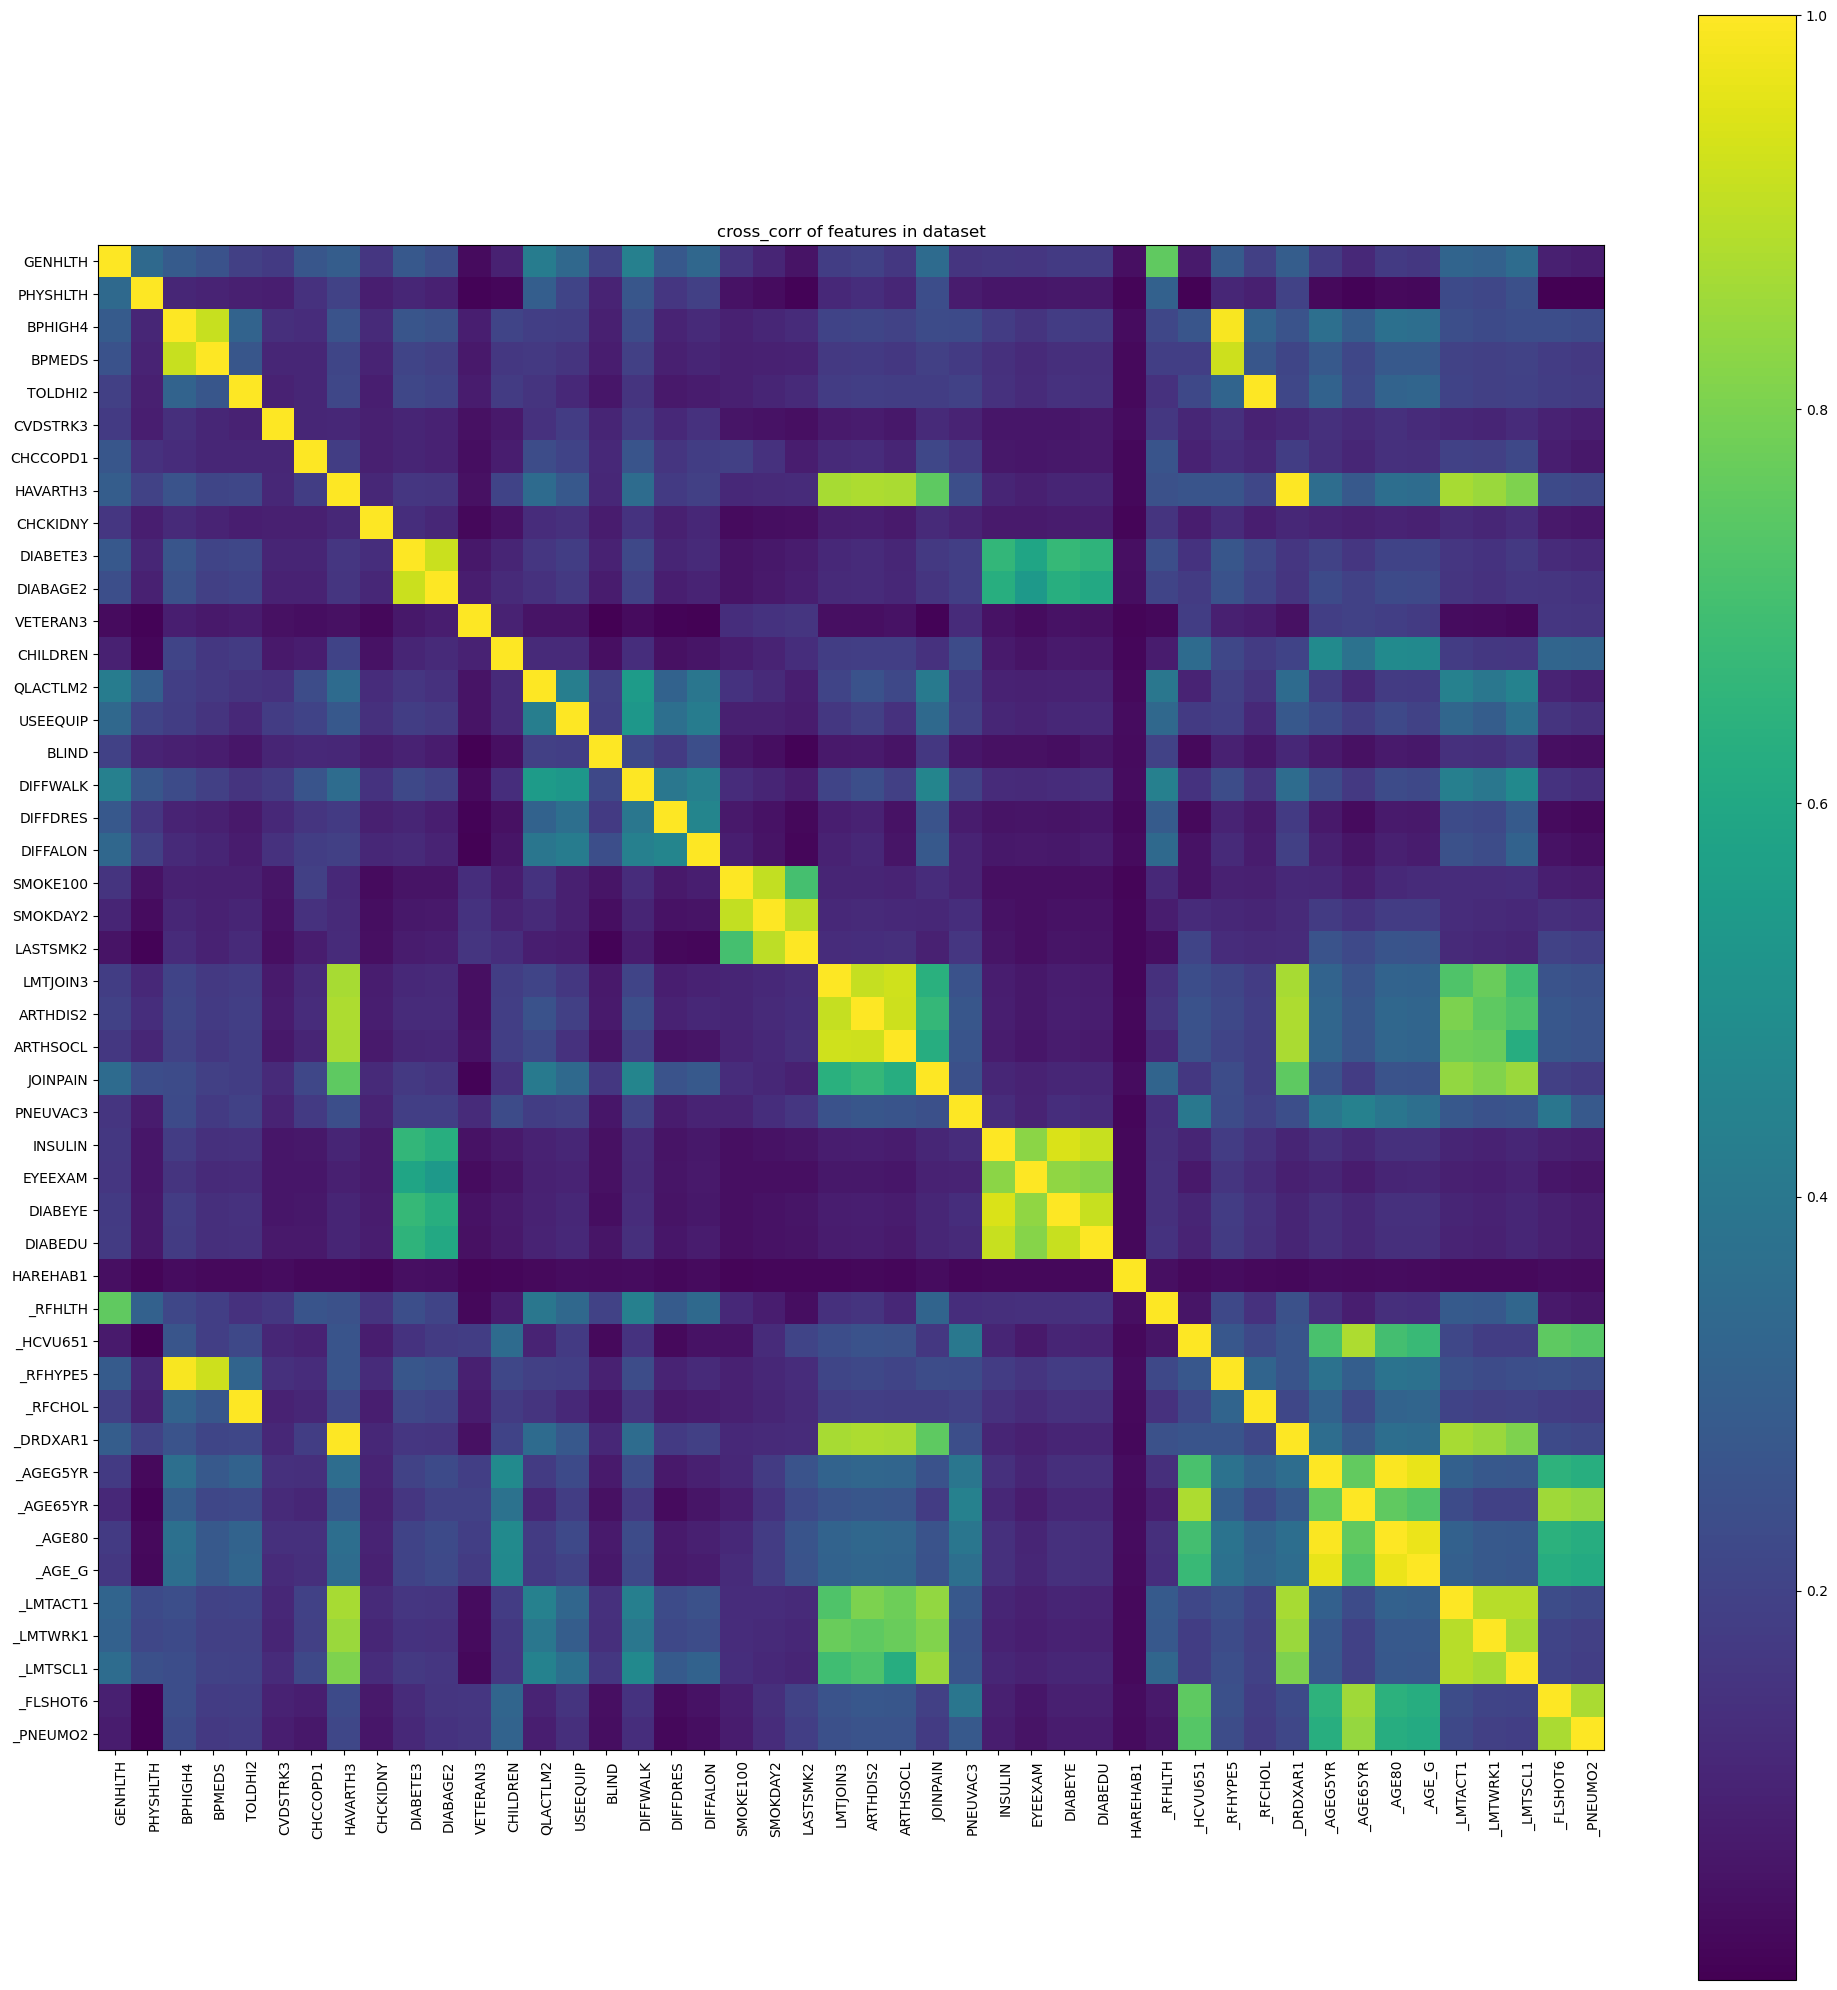

In [132]:
correlation_matrix = show_cross_corr(x_train_reduced, correlated_features)

In [ ]:
# divide them into based on their group

blood_features = ["BPHIGH4","BPMEDS","_RFHYPE5"]
diabete_features = ["DIABETE3","DIABAGE2","INSULIN","EYEEXAM","DIABEYE","DIABEDU"]
arthritis_features = ["_DRDXAR1","_LMTACT1","_LMTWRK1","_LMTSCL1","LMTJOIN3","ARTHSOCL","ARTHDIS2","JOINPAIN","HAVARTH3"]
smoking_features = ["SMOKE100","SMOKDAY2","LASTSMK2"]
age_features = ["_HCVU651","_AGEG5YR","_AGE65YR","_AGE80","_AGE_G"]

In [ ]:
# drop some meaningless features

cross_correlated_to_drop = ["BPHIGH4","BPMEDS","DIABAGE2","INSULIN","EYEEXAM","DIABEYE","DIABEDU","_LMTACT1","_LMTWRK1","_LMTSCL1","LMTJOIN3","ARTHSOCL","ARTHDIS2","JOINPAIN","SMOKDAY2","LASTSMK2","_HCVU651","_AGE65YR","_AGE80","_AGE_G","HAVARTH3"]

In [133]:
for feature in cross_correlated_to_drop:
    correlated_features.pop(correlated_features.index(feature))

In [ ]:
# final features --> 26

correlated_features

['GENHLTH',
 'PHYSHLTH',
 'TOLDHI2',
 'CVDSTRK3',
 'CHCCOPD1',
 'HAVARTH3',
 'CHCKIDNY',
 'DIABETE3',
 'VETERAN3',
 'CHILDREN',
 'QLACTLM2',
 'USEEQUIP',
 'BLIND',
 'DIFFWALK',
 'DIFFDRES',
 'DIFFALON',
 'SMOKE100',
 'PNEUVAC3',
 'HAREHAB1',
 '_RFHLTH',
 '_RFHYPE5',
 '_RFCHOL',
 '_DRDXAR1',
 '_AGEG5YR',
 '_FLSHOT6',
 '_PNEUMO2']